In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./tslec'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
comment_df = pd.read_excel(open('2022-05-06_19_17_37.xlsx', 'rb'),
              sheet_name='Comments', skiprows=[0])  

In [4]:
comment_df.head(5)

,Социальная сеть,ID поста,ID комментария,Владелец,ID Владелеца,Текст,Эмоциональный окрас,Дата,Лайков
0,Вконтакте,-115807015_2334,5412482_2336,Валентин Точилкин,5412482,Задумка понравилась! Думаю будет смотреться лу...,Нейтральность,2021-12-31 08:19:05,1
1,Вконтакте,-30666517_1774956,308730199_1774960,Денис Гончаров,308730199,Вам тоже здоровья и удачи в прошлом и крепкого...,Вежливость,2021-12-31 07:09:40,9
2,Вконтакте,-30666517_1774956,10784303_1774979,Олег Кирин,10784303,Полагаю: Вера и Надежда – это тимлид и прожект...,Юмор,2021-12-31 09:20:39,4
3,Вконтакте,-30666517_1774956,586953361_1775092,Замбек Замбеков,586953361,этот интеллект на али давно существует,Нейтральность,2021-12-31 20:38:00,1
4,Вконтакте,-30666517_1774956,19496621_1775350,Александр Бирабиджанов,19496621,Будет вечный Свет.,Нейтральность,2022-01-03 00:04:52,1


In [5]:
report_df = pd.read_excel(open('2022-05-06_19_17_37.xlsx', 'rb'),
              sheet_name='Report', skiprows=[0])  

In [6]:
report_df.head(5)

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негативных комментариев,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0,0,0,0,0,0
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,0,0,0,0,0,0
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,0,0,0,0,0,0
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,0,0,0,0,0,0
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,0,0,0,0,0,0


#Задание 3

Построим датафрейм, содержащий дату и суммарное количество просмотров постов за этот день

In [7]:
report_df['День'] = report_df['Дата'].apply(lambda x: x[0:10])

In [8]:
report_df.head(5)

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негативных комментариев,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев,День
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0,0,0,0,0,0,2021-12-31
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,0,0,0,0,0,0,2021-12-31
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,0,0,0,0,0,0,2021-12-31
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,0,0,0,0,0,0,2021-12-31
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,0,0,0,0,0,0,2021-12-31


Добавили колонку с днем

In [9]:
dates = report_df['День'].unique().tolist()

In [10]:
dates = [i[0:10] for i in dates]
sums = []

In [11]:
for date in dates:
  temp_df = report_df.loc[report_df['День'] == date]
  sum = temp_df['Просмотров'].sum()
  sums.append(sum)
  #print("Date ", date)
  #print("Sum ", sum)

In [12]:
df_to_forecast = pd.DataFrame(list(zip(dates, sums)),
               columns =['Date', 'Sum'])

In [13]:
df_to_forecast.head(5)

,Date,Sum
0,2021-12-31,79657.0
1,2021-12-30,5230248.0
2,2021-12-29,816734.0
3,2021-12-28,780446.0
4,2021-12-27,716678.0


Получили датафрейм для работы

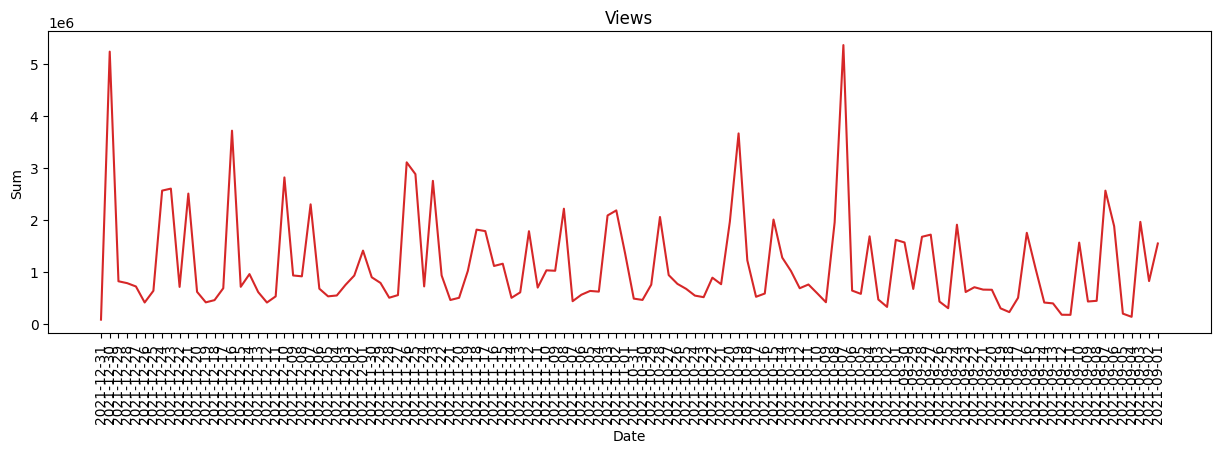

In [14]:
def plot_df(df_to_forecast, x, y, title="", xlabel='Date', ylabel='Sum', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.show()
    

plot_df(df_to_forecast, x=df_to_forecast['Date'], y=df_to_forecast['Sum'], title='Views')

Разобъем временной ряд на составляющие

In [15]:
df = df_to_forecast

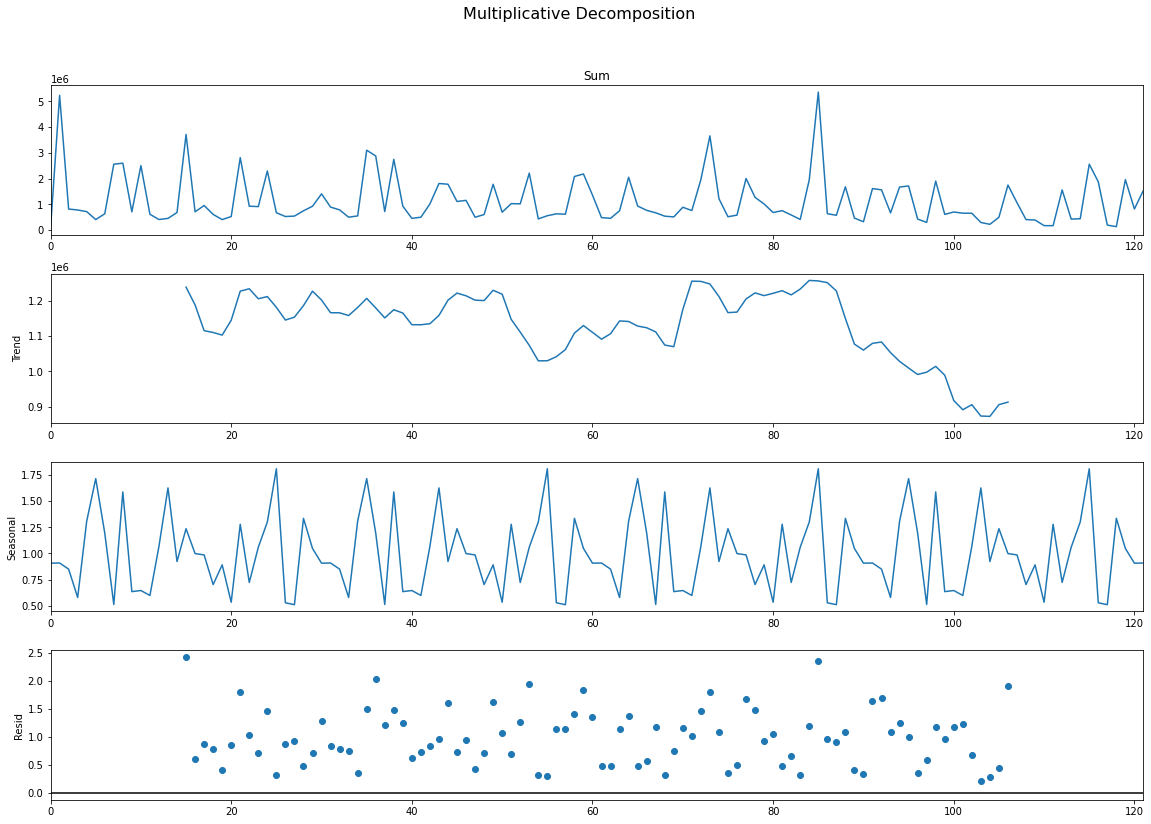

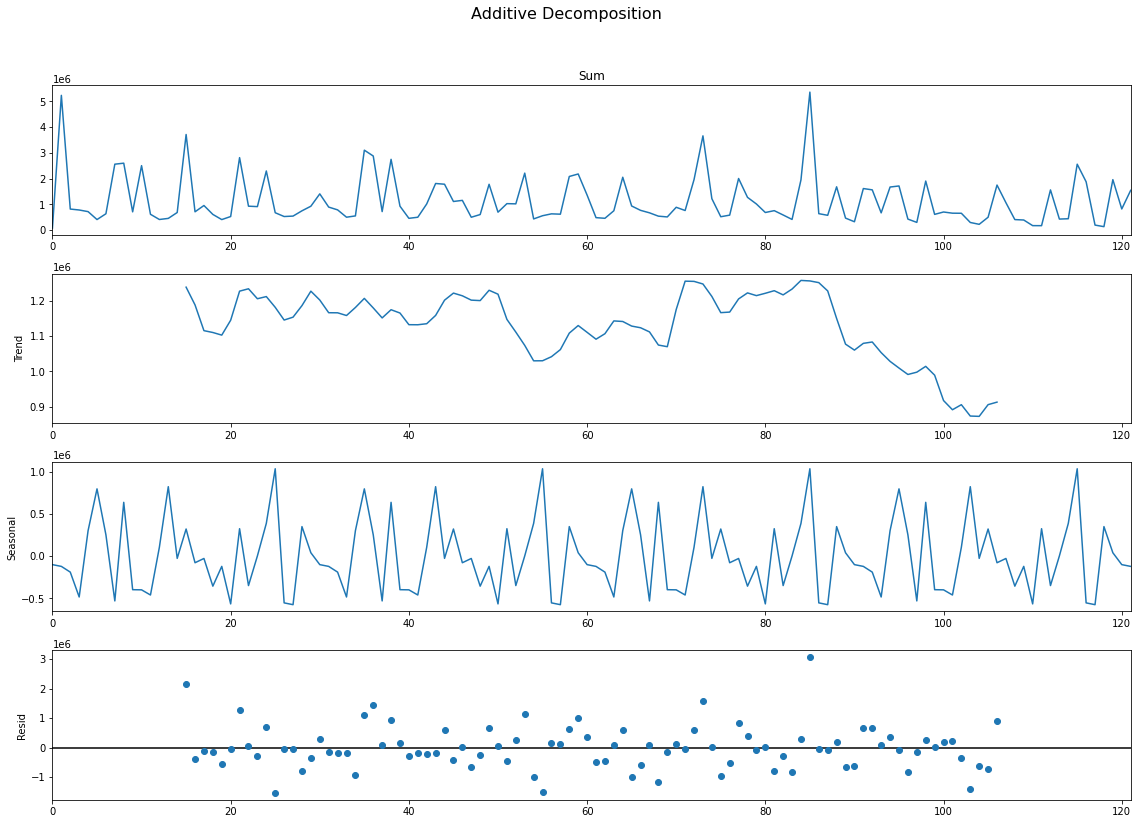

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Sum'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Sum'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Проверим на стационарность

In [17]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Sum'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -9.6801392380864
n_lags: 1.2108021682798916e-16
p-value: 1.2108021682798916e-16
Critial Values:
   1%, -3.486055829282407
Critial Values:
   5%, -2.8859430324074076
Critial Values:
   10%, -2.5797850694444446


Ряд стационарный

Используем SARIMAX

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
df.isna().sum() 

Date    0
Sum     0
dtype: int64

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    122 non-null    datetime64[ns]
 1   Sum     122 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [22]:
df

,Date,Sum
0,2021-12-31,79657.0
1,2021-12-30,5230248.0
2,2021-12-29,816734.0
3,2021-12-28,780446.0
4,2021-12-27,716678.0
...,...,...
117,2021-09-05,194381.0
118,2021-09-04,133318.0
119,2021-09-03,1958340.0
120,2021-09-02,820271.0


In [23]:
arima = SARIMAX(df['Sum'],order=(7,1,7))
arima_results = arima.fit()
arima_value_forecast = arima_results.get_forecast(steps=31).predicted_mean

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


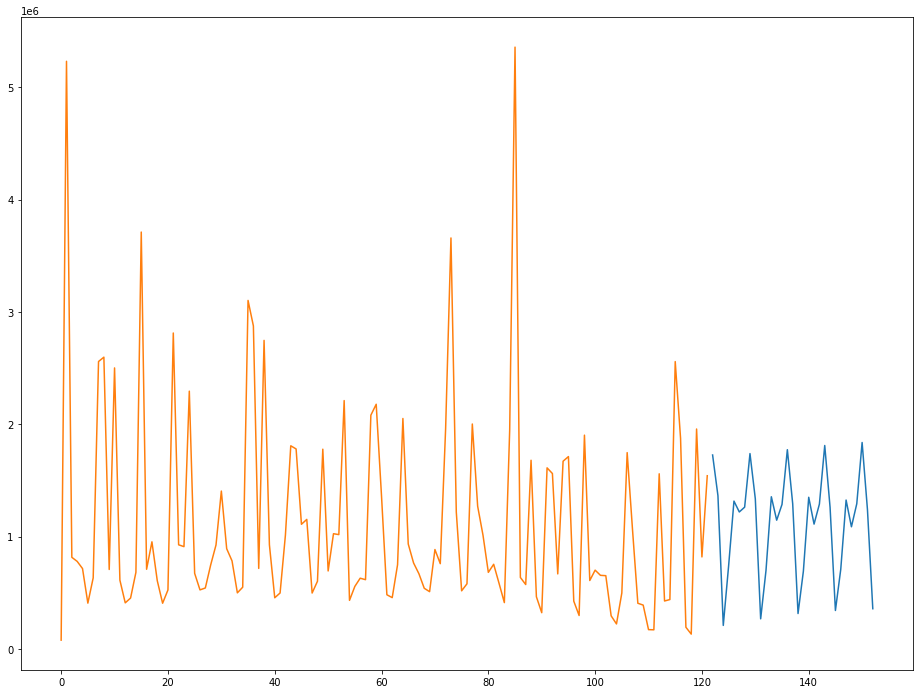

In [24]:
plt.plot(arima_value_forecast)
plt.plot(df['Sum'])

Получили предсказания на 31 день

Видим, что модель примерно предсказывает

#Задание 2

In [25]:
report_df.head()

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негативных комментариев,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев,День
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0,0,0,0,0,0,2021-12-31
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,0,0,0,0,0,0,2021-12-31
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,0,0,0,0,0,0,2021-12-31
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,0,0,0,0,0,0,2021-12-31
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,0,0,0,0,0,0,2021-12-31


In [26]:
df_report_for_bgramms = report_df['Текст']

In [27]:
df_report_for_bgramms.head()

0    Нам задают много вопросов о технологическом ко...
1    В высадке на Марс бизнесмен видит возможность ...
2    Гораздо чаще остальных американские компании и...
3    Twitter-аккаунт, который ранее связывали с защ...
4    Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...
Name: Текст, dtype: object

In [28]:
comment_df.head()

,Социальная сеть,ID поста,ID комментария,Владелец,ID Владелеца,Текст,Эмоциональный окрас,Дата,Лайков
0,Вконтакте,-115807015_2334,5412482_2336,Валентин Точилкин,5412482,Задумка понравилась! Думаю будет смотреться лу...,Нейтральность,2021-12-31 08:19:05,1
1,Вконтакте,-30666517_1774956,308730199_1774960,Денис Гончаров,308730199,Вам тоже здоровья и удачи в прошлом и крепкого...,Вежливость,2021-12-31 07:09:40,9
2,Вконтакте,-30666517_1774956,10784303_1774979,Олег Кирин,10784303,Полагаю: Вера и Надежда – это тимлид и прожект...,Юмор,2021-12-31 09:20:39,4
3,Вконтакте,-30666517_1774956,586953361_1775092,Замбек Замбеков,586953361,этот интеллект на али давно существует,Нейтральность,2021-12-31 20:38:00,1
4,Вконтакте,-30666517_1774956,19496621_1775350,Александр Бирабиджанов,19496621,Будет вечный Свет.,Нейтральность,2022-01-03 00:04:52,1


In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
from nltk.util import ngrams

In [41]:
comment_df["Текст"].fillna("", inplace=True)

In [43]:
report_df.isna().sum()

Социальная сеть                 0
ID поста                        0
Владелец                        0
Текст                           0
Эмоциональный окрас             0
Дата                            0
Комментариев                    0
Лайков                          0
Репостов                        0
Просмотров                     37
Негативных комментариев         0
Позитивных комментариев         0
Нейтральных комментариев        0
Неопределенных комментариев     0
Вежливых комментариев           0
Юмористических комментариев     0
День                            0
dtype: int64

In [42]:
comment_df.isna().sum()

Социальная сеть        0
ID поста               0
ID комментария         0
Владелец               0
ID Владелеца           0
Текст                  0
Эмоциональный окрас    0
Дата                   0
Лайков                 0
dtype: int64

In [44]:
comment_texts = comment_df['Текст'].tolist()
for i in range(5):
  print(comment_texts[i])

Задумка понравилась! Думаю будет смотреться лучше, если сами граффити будут веселыми картинками или мемами, а просто надписи как в реальности смотрятся не очень. На ум приходит Бэнкси
Вам тоже здоровья и удачи в прошлом и крепкого юмора в следующие 365 неделей и наступающих прекрасных дней!
Полагаю: Вера и Надежда – это тимлид и прожектманагер.
этот интеллект на али давно существует
Будет вечный Свет.


In [45]:
from nltk.tokenize import RegexpTokenizer

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [48]:
import re

In [50]:
from nltk.util import ngrams

In [51]:
n = 2

In [ ]:
comment_2grams = []
for text in comment_texts:
  text = text.lower()
  text = re.sub(r'[^\w\s]','',text)
  bigrams = ngrams(text.split(), n)
  for item in bigrams:
    comment_2grams.append(item)
  

In [58]:
type(comment_2grams[0])

tuple

In [59]:
from collections import Counter

In [66]:
res = dict(Counter([x for x in comment_2grams]).most_common())

In [72]:
from itertools import islice

def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

In [74]:
n_items = take(10, res.items())
n_items

[(('у', 'меня'), 603),
 (('у', 'вас'), 410),
 (('и', 'не'), 393),
 (('по', 'моей'), 333),
 (('я', 'не'), 295),
 (('бесплатное', 'обслуживание'), 288),
 (('потому', 'что'), 286),
 (('моей', 'ссылке'), 283),
 (('бесплатным', 'обслуживанием'), 271),
 (('2', 'месяца'), 264)]

Самые частовстречаемые биграммы из комментариев

In [75]:
report_texts = report_df['Текст'].tolist()

In [76]:
report_2grams = []
for text in report_texts:
  text = text.lower()
  text = re.sub(r'[^\w\s]','',text)
  bigrams = ngrams(text.split(), n)
  for item in bigrams:
    report_2grams.append(item)

In [77]:
res = dict(Counter([x for x in report_2grams]).most_common())

In [78]:
res

{('по', 'ссылке'): 1263,
 ('а', 'также'): 1027,
 ('о', 'том'): 799,
 ('с', 'помощью'): 660,
 ('на', 'сайте'): 604,
 ('в', 'этом'): 586,
 ('и', 'как'): 568,
 ('в', 'россии'): 542,
 ('если', 'вы'): 495,
 ('не', 'только'): 492,
 ('в', 'рамках'): 482,
 ('вместе', 'с'): 453,
 ('том', 'как'): 452,
 ('и', 'не'): 447,
 ('и', 'в'): 427,
 ('2021', 'года'): 424,
 ('участие', 'в'): 410,
 ('у', 'нас'): 408,
 ('в', 'сфере'): 395,
 ('в', 'it'): 384,
 ('но', 'и'): 335,
 ('на', 'нашем'): 332,
 ('в', 'области'): 328,
 ('во', 'время'): 327,
 ('и', 'другие'): 325,
 ('тех', 'кто'): 311,
 ('для', 'вас'): 310,
 ('технополис', 'москва'): 306,
 ('у', 'вас'): 302,
 ('вы', 'сможете'): 292,
 ('в', 'течение'): 290,
 ('в', 'том'): 290,
 ('что', 'такое'): 281,
 ('вы', 'узнаете'): 275,
 ('в', 'москве'): 267,
 ('000', 'рублей'): 264,
 ('в', 'мире'): 260,
 ('в', 'этой'): 260,
 ('один', 'из'): 259,
 ('оэз', 'технополис'): 254,
 ('ноября', 'в'): 254,
 ('доступ', 'к'): 253,
 ('этом', 'году'): 252,
 ('вы', 'можете'): 250,


In [79]:
n_items = take(10, res.items())
n_items

[(('по', 'ссылке'), 1263),
 (('а', 'также'), 1027),
 (('о', 'том'), 799),
 (('с', 'помощью'), 660),
 (('на', 'сайте'), 604),
 (('в', 'этом'), 586),
 (('и', 'как'), 568),
 (('в', 'россии'), 542),
 (('если', 'вы'), 495),
 (('не', 'только'), 492)]

Наиболее частые биграммы в постах

#Задание 1

Идея:


1.   Смотрим окрас поста
2.   Собираем для каждого окраса количество комментов
3.   Изучаем окрасы комментов
4.   Собираем все в датафрейм
5.   Изучаем датафрейм и думаем, строим графики



In [80]:
report_df

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негативных комментариев,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев,День
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0,0,0,0,0,0,2021-12-31
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,0,0,0,0,0,0,2021-12-31
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,0,0,0,0,0,0,2021-12-31
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,0,0,0,0,0,0,2021-12-31
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,0,0,0,0,0,0,2021-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13625,Вконтакте,-25758_79797,Changellenge >> Карьера от студента к СЕО,#education@changellengeglobal #Changellenge #C...,Позитив,2021-09-01 08:12:00,0,1,0,3430.0,0,0,0,0,0,0,2021-09-01
13626,Вконтакте,-68023176_17665,AppTractor,В этой статье я хотел бы поделиться своим опыт...,Нейтральность,2021-09-01 08:08:37,0,1,0,160.0,0,0,0,0,0,0,2021-09-01
13627,Вконтакте,-66178731_602,Управление проектами в России | ГК ПМСОФТ,#ДЕНЬЗНАНИЙ #1СЕНТЯБРЯ #ПМСОФТ\n🍁☀️🧁🎈💐\n\n#сп...,Позитив,2021-09-01 08:01:23,0,3,0,66.0,0,0,0,0,0,0,2021-09-01
13628,Вконтакте,-139121250_17894,iT News,Microsoft раскрыла дату выхода Windows 11\n \n...,Нейтральность,2021-09-01 08:00:01,0,6,4,896.0,0,0,0,0,0,0,2021-09-01


In [84]:
report_df.columns

Index(['Социальная сеть', 'ID поста', 'Владелец', 'Текст',
       'Эмоциональный окрас', 'Дата', 'Комментариев', 'Лайков', 'Репостов',
       'Просмотров', 'Негативных комментариев', 'Позитивных комментариев',
       'Нейтральных комментариев', 'Неопределенных комментариев',
       'Вежливых комментариев', 'Юмористических комментариев', 'День'],
      dtype='object')

In [194]:
def getPostsData(posts_df):
  for index, row in report_df.iterrows():
      id = row['ID поста']
      self_emotion = row['Эмоциональный окрас']
      positive = row['Позитивных комментариев']
      negative = row['Негативных комментариев']
      neutral = row['Нейтральных комментариев']
      uncertain = row['Неопределенных комментариев']
      polite = row['Вежливых комментариев']
      humor = row['Юмористических комментариев']
      self_count = 0
      sum = positive + negative + neutral + uncertain + polite + humor
      percentage = 0
      others_sum = 0
      if sum != 0:
        if self_emotion == 'Позитив':
          percentage = (positive / sum) * 100
          self_count = positive
          others_sum = negative + neutral + uncertain + polite + humor
        if self_emotion == 'Нейтральность':
          percentage = (neutral / sum) * 100
          self_count = neutral
          others_sum = positive + negative + uncertain + polite + humor
        if self_emotion == 'Негатив':
          percentage = (negative / sum) * 100
          self_count = negative
          others_sum = positive + neutral + uncertain + polite + humor
        if self_emotion == 'Вежливость':
          percentage = (polite / sum) * 100
          self_count = polite
          others_sum = positive + neutral + uncertain + negative + humor
        if self_emotion == 'Неопределенность':
          percentage = (uncertain / sum) * 100
          self_count = uncertain
          others_sum = positive + neutral + negative + negative + humor
        if self_emotion == 'Юмор':
          percentage = (humor / sum) * 100
          self_count = humor
          others_sum = positive + neutral + uncertain + negative + negative
        post_data = [[id, self_emotion, positive, negative, neutral, uncertain, polite, humor, percentage, self_count, others_sum, sum]]
 
      
      
        df2 = pd.DataFrame(post_data, columns=['ID поста','Окрас','Позитивных', 
                                                    'Негативных', 'Нейтральных', 'Неопределённых',
                                                    'Вежливых', 'Юмористических', 'Процент таких же', 'Количество таких же', 'Сумма других', 'Общая сумма'])
      
        posts_df = pd.concat([posts_df, df2])
  return posts_df

In [198]:
posts_df = pd.DataFrame()

In [199]:
result = getPostsData(posts_df)

In [200]:
result

,ID поста,Окрас,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Процент таких же,Количество таких же,Сумма других,Общая сумма
0,-115807015_2334,Позитив,0,0,1,0,0,0,0.0,0,1,1
0,-30666517_1774956,Негатив,0,0,2,0,1,1,0.0,0,4,4
0,-54530371_346101,Нейтральность,0,3,9,1,0,2,60.0,9,6,15
0,-173250756_9317,Нейтральность,0,0,2,0,0,0,100.0,2,0,2
0,-54530371_346090,Нейтральность,0,2,2,0,0,0,50.0,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
0,-58536976_3138,Позитив,0,0,2,0,0,0,0.0,0,2,2
0,-29617250_2531,Позитив,1,0,0,0,0,0,100.0,1,0,1
0,-24682865_28855,Нейтральность,0,1,3,1,0,1,50.0,3,3,6
0,-139121250_17896,Нейтральность,0,0,2,0,0,0,100.0,2,0,2


Убрали посты без комментариев

Посмотрим отношение количества и процента

In [201]:
result['Отношение своих'] = result['Количество таких же'] / result['Процент таких же']

In [217]:
result['Отношение чужих'] = result['Количество таких же'] / result['Сумма других']
result['Разность между своими и чужими'] = result['Количество таких же'] - result['Сумма других']

In [203]:
result = result.fillna(0)

Чтобы получить посты с самой сильной мерой связи окраса поста с окрасом его комментариев:
* смотрим на проценты, но важно, чтобы было больше всего комментариев == максимальная положительная разница

In [211]:
result['Нормированные сильные'] = result['Процент таких же'] / result['Общая сумма']

In [212]:
result

,ID поста,Окрас,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Процент таких же,Количество таких же,Сумма других,Общая сумма,Отношение своих,Отношение чужих,Разность между своими и чужими,Нормированные сильные
0,-115807015_2334,Позитив,0,0,1,0,0,0,0.0,0,1,1,0.00,0.0,1,0.000000
0,-30666517_1774956,Негатив,0,0,2,0,1,1,0.0,0,4,4,0.00,0.0,4,0.000000
0,-54530371_346101,Нейтральность,0,3,9,1,0,2,60.0,9,6,15,0.15,1.5,-3,4.000000
0,-173250756_9317,Нейтральность,0,0,2,0,0,0,100.0,2,0,2,0.02,inf,-2,50.000000
0,-54530371_346090,Нейтральность,0,2,2,0,0,0,50.0,2,2,4,0.04,1.0,0,12.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-58536976_3138,Позитив,0,0,2,0,0,0,0.0,0,2,2,0.00,0.0,2,0.000000
0,-29617250_2531,Позитив,1,0,0,0,0,0,100.0,1,0,1,0.01,inf,-1,100.000000
0,-24682865_28855,Нейтральность,0,1,3,1,0,1,50.0,3,3,6,0.06,1.0,0,8.333333
0,-139121250_17896,Нейтральность,0,0,2,0,0,0,100.0,2,0,2,0.02,inf,-2,50.000000


In [214]:
result.sort_values(['Нормированные сильные'], ascending = False)

,ID поста,Окрас,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Процент таких же,Количество таких же,Сумма других,Общая сумма,Отношение своих,Отношение чужих,Разность между своими и чужими,Нормированные сильные
0,-24893388_5091,Нейтральность,0,0,1,0,0,0,100.0,1,0,1,0.01,inf,-1,100.0
0,-24893388_5050,Нейтральность,0,0,1,0,0,0,100.0,1,0,1,0.01,inf,-1,100.0
0,-147464741_323,Нейтральность,0,0,1,0,0,0,100.0,1,0,1,0.01,inf,-1,100.0
0,-115807015_2228,Позитив,1,0,0,0,0,0,100.0,1,0,1,0.01,inf,-1,100.0
0,-140226666_8825,Нейтральность,0,0,1,0,0,0,100.0,1,0,1,0.01,inf,-1,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-29617250_2720,Позитив,0,1,0,0,0,0,0.0,0,1,1,0.00,0.0,1,0.0
0,-182599383_11294,Позитив,0,0,0,0,0,1,0.0,0,1,1,0.00,0.0,1,0.0
0,-54530371_342701,Позитив,0,1,5,1,0,0,0.0,0,7,7,0.00,0.0,7,0.0
0,-30666517_1766456,Позитив,0,0,2,0,0,0,0.0,0,2,2,0.00,0.0,2,0.0


In [215]:
result.sort_values(['Общая сумма', 'Процент таких же'], ascending=[False, False])

,ID поста,Окрас,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Процент таких же,Количество таких же,Сумма других,Общая сумма,Отношение своих,Отношение чужих,Разность между своими и чужими,Нормированные сильные
0,-20225241_593076,Позитив,57,114,183,20,21,22,13.669065,57,360,417,4.17,0.158333,303,0.032780
0,-30666517_1774567,Нейтральность,10,52,233,113,3,2,56.416465,233,180,413,4.13,1.294444,-53,0.136602
0,-140226666_9118,Нейтральность,58,1,146,31,114,1,41.595442,146,205,351,3.51,0.712195,59,0.118506
0,-20225241_580678,Позитив,14,65,169,3,7,31,4.844291,14,275,289,2.89,0.050909,261,0.016762
0,-20225241_576790,Нейтральность,50,59,144,2,6,22,50.883392,144,139,283,2.83,1.035971,-5,0.179800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-21022222_313760,Негатив,0,0,0,0,0,1,0.000000,0,1,1,0.00,0.000000,1,0.000000
0,-62420927_29988,Позитив,0,0,1,0,0,0,0.000000,0,1,1,0.00,0.000000,1,0.000000
0,-32017543_26488,Позитив,0,0,1,0,0,0,0.000000,0,1,1,0.00,0.000000,1,0.000000
0,-32017543_26485,Позитив,0,0,0,1,0,0,0.000000,0,1,1,0.00,0.000000,1,0.000000


In [191]:
result.head(3)

,ID поста,Окрас,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Процент таких же,Количество таких же,Сумма других,Общая сумма,Отношение своих,Отношение чужих,Разность между своими и чужими
0,-20225241_593076,Позитив,57,114,183,20,21,22,13.669065,57,360,417,4.17,0.158333,303
0,-30666517_1774567,Нейтральность,10,52,233,113,3,2,56.416465,233,180,413,4.13,1.294444,-53
0,-140226666_9118,Нейтральность,58,1,146,31,114,1,41.595442,146,205,351,3.51,0.712195,59


In [219]:
result.sort_values(['Разность между своими и чужими'], ascending = False).head(3)

,ID поста,Окрас,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Процент таких же,Количество таких же,Сумма других,Общая сумма,Отношение своих,Отношение чужих,Разность между своими и чужими,Нормированные сильные
0,-15365973_1319090,Нейтральность,16,8,147,14,2,3,77.368421,147,43,190,1.90,3.418605,104,0.407202
0,-30666517_1774144,Нейтральность,9,6,77,6,0,3,76.237624,77,24,101,1.01,3.208333,53,0.754828
0,-30666517_1774567,Нейтральность,10,52,233,113,3,2,56.416465,233,180,413,4.13,1.294444,53,0.136602


Чтобы получить посты с самой слабой мерой связи окраса поста с окрасом его комментариев:
* разница между своими и чужими максимальна, а процент своих минимален == максимальная отрицательная разница

In [220]:
result.sort_values(['Разность между своими и чужими'], ascending = True).head(3)

,ID поста,Окрас,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Процент таких же,Количество таких же,Сумма других,Общая сумма,Отношение своих,Отношение чужих,Разность между своими и чужими,Нормированные сильные
0,-20225241_593076,Позитив,57,114,183,20,21,22,13.669065,57,360,417,4.17,0.158333,-303,0.032780
0,-20225241_580678,Позитив,14,65,169,3,7,31,4.844291,14,275,289,2.89,0.050909,-261,0.016762
0,-23242408_206066,Позитив,19,63,86,9,9,15,9.452736,19,182,201,2.01,0.104396,-163,0.047029
